In [1]:
import matplotlib.pyplot as plt
import torch
import sys, os
sys.path.insert(0, os.path.abspath(".."))
from src.data.data_loader import SatelliteDataLoader

loader = SatelliteDataLoader(data_path="../src/data/UCMerced_LandUse/Images", batch_size=16)
train_loader, val_loader = loader.get_loaders()
class_names = loader.get_class_names()
print(f'{len(class_names)} classes found: {class_names}')

21 classes found: ['agricultural', 'airplane', 'baseballdiamond', 'beach', 'buildings', 'chaparral', 'denseresidential', 'forest', 'freeway', 'golfcourse', 'harbor', 'intersection', 'mediumresidential', 'mobilehomepark', 'overpass', 'parkinglot', 'river', 'runway', 'sparseresidential', 'storagetanks', 'tenniscourt']


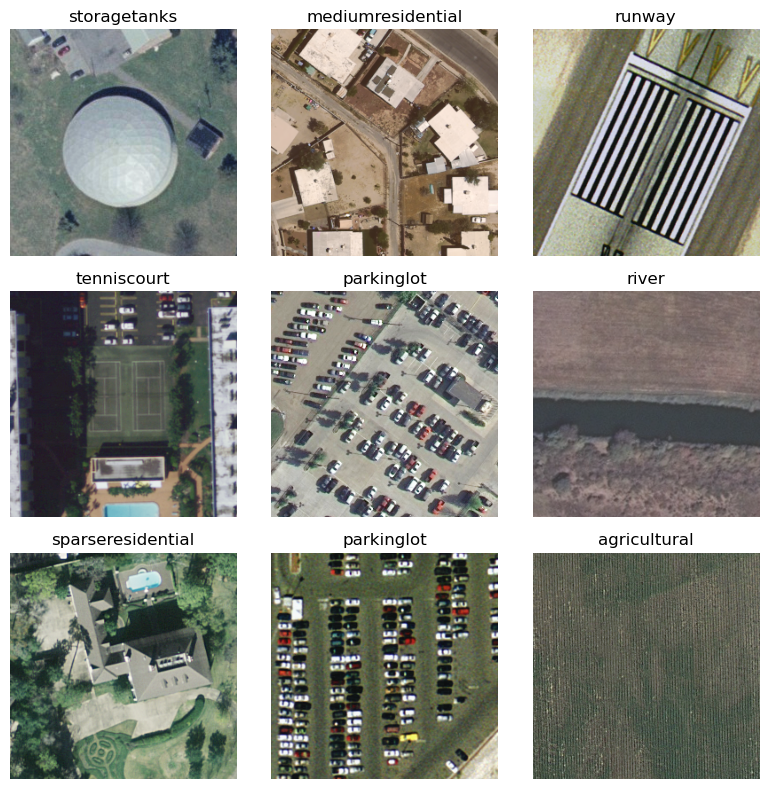

In [ ]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

images, labels = next(iter(train_loader))

inv_normalize = torch.nn.Sequential(
    transforms.Normalize(mean=[0., 0., 0.],
                         std=[1/0.229, 1/0.224, 1/0.225]),
    transforms.Normalize(mean=[-0.485, -0.456, -0.406],
                         std=[1., 1., 1.])
)

fig, axes = plt.subplots(3, 3, figsize=(8,8))
for i, ax in enumerate(axes.flatten()):
    img = inv_normalize(images[i]).permute(1,2,0).clamp(0,1)
    ax.imshow(img)
    ax.set_title(class_names[labels[i]])
    ax.axis('off')
plt.tight_layout()
plt.show()


In [3]:
from collections import Counter

train_counts = Counter(loader.train_dataset.indices[i] for i in range(len(loader.train_dataset)))

all_labels = [lbl for _, lbl in train_loader.dataset]
train_count = Counter(all_labels)

val_labels = [lbl for _, lbl in val_loader.dataset]
val_count = Counter(val_labels)

print("Train distribution:")
for idx, cnt in sorted(train_count.items()):
    print(f"  {class_names[idx]:<20}: {cnt}")
    
print("\nValidation distribution:")
for idx, cnt in sorted(val_count.items()):
    print(f"  {class_names[idx]:<20}: {cnt}")


Train distribution:
  agricultural        : 75
  airplane            : 80
  baseballdiamond     : 86
  beach               : 80
  buildings           : 79
  chaparral           : 88
  denseresidential    : 84
  forest              : 77
  freeway             : 82
  golfcourse          : 83
  harbor              : 77
  intersection        : 79
  mediumresidential   : 80
  mobilehomepark      : 79
  overpass            : 72
  parkinglot          : 78
  river               : 82
  runway              : 85
  sparseresidential   : 77
  storagetanks        : 77
  tenniscourt         : 80

Validation distribution:
  agricultural        : 25
  airplane            : 20
  baseballdiamond     : 14
  beach               : 20
  buildings           : 21
  chaparral           : 12
  denseresidential    : 16
  forest              : 23
  freeway             : 18
  golfcourse          : 17
  harbor              : 23
  intersection        : 21
  mediumresidential   : 20
  mobilehomepark      : 21
  overpas

In [4]:
print("Sample image tensor shape:", images[0].shape)
print("Value range (normalized):", images.min().item(), "to", images.max().item())

Sample image tensor shape: torch.Size([3, 256, 256])
Value range (normalized): -2.1179039478302 to 2.640000104904175
